In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

In [55]:
liver_df = pd.read_csv(r"E:\GUVI\Project 4\indian_liver_patient - indian_liver_patient.csv")

In [56]:
print(liver_df.info())
print(liver_df.describe())
print("Missing values:\n", liver_df.isnull().sum())
print("Unique values in Gender:", liver_df['Gender'].unique())
print("Unique values in Dataset:", liver_df['Dataset'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None
              Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  5

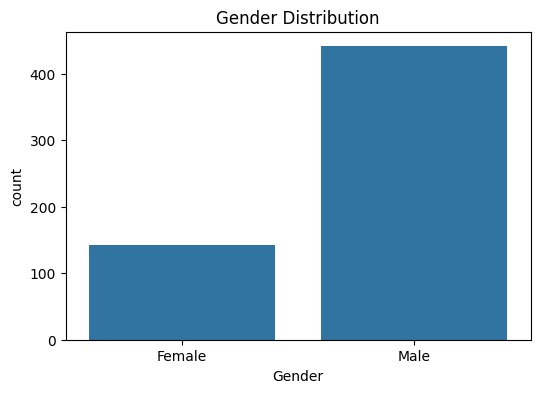

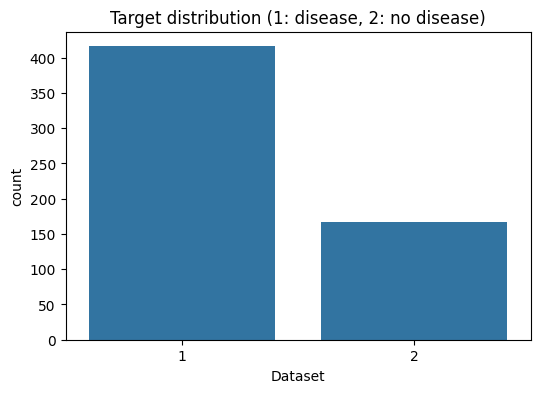

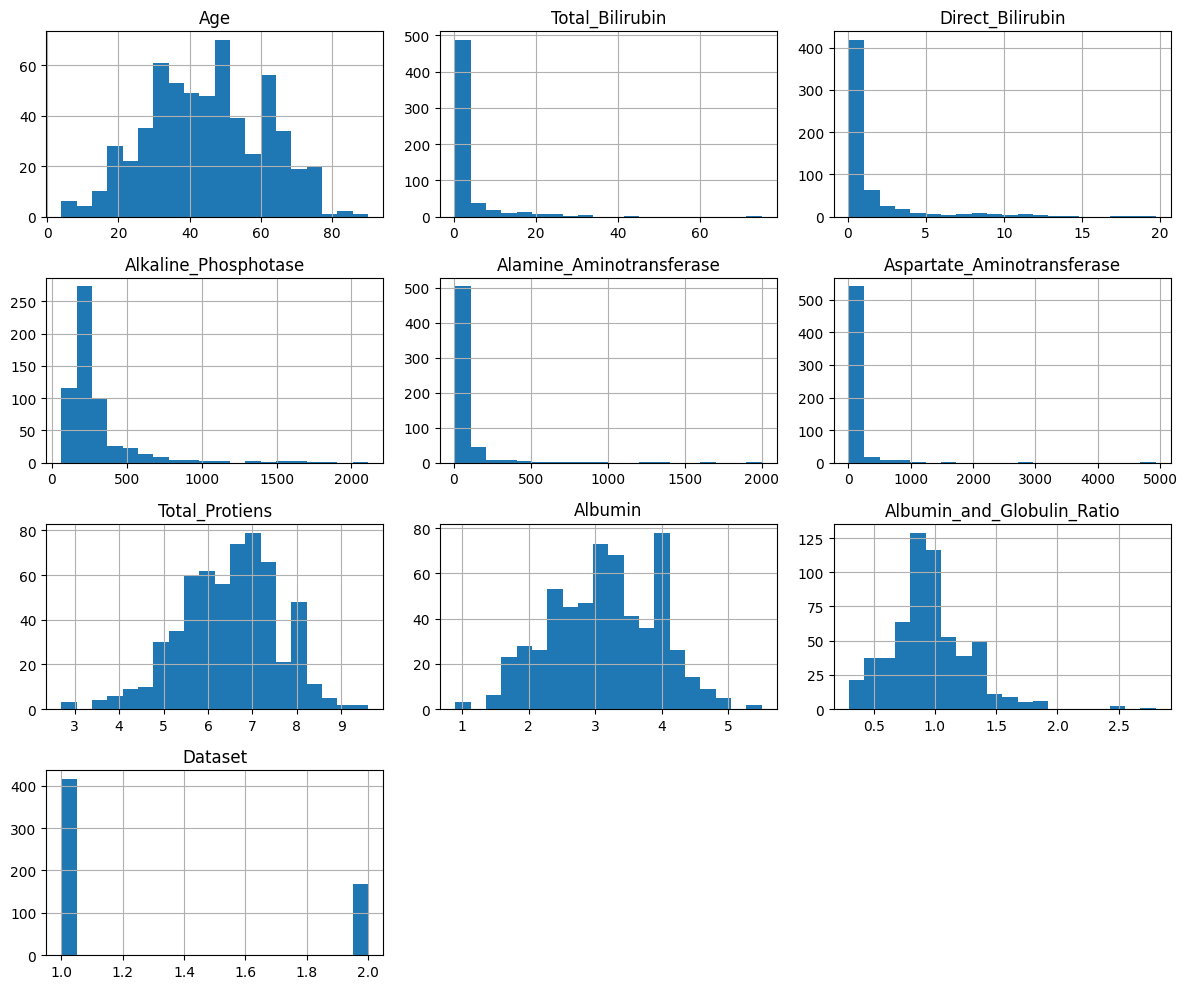

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=liver_df)
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Dataset', data=liver_df)
plt.title('Target distribution (1: disease, 2: no disease)')
plt.show()

liver_df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

In [58]:
liver_df['Albumin_and_Globulin_Ratio'].fillna(liver_df['Albumin_and_Globulin_Ratio'].median(), inplace=True)

liver_df['Gender'] = liver_df['Gender'].map({'Female': 0, 'Male': 1})

X = liver_df.drop('Dataset', axis=1)
y = liver_df['Dataset']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

y_train_res_fixed = y_train_res.replace({2:0})
y_test_fixed = y_test.replace({2:0})

In [61]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [94]:
print("\nModel comparison (5-fold cross-validation):")
for name, model in models.items():
    scores = cross_val_score(model, X_train_res, y_train_res_fixed, cv=5, scoring='recall')
    print(f"{name}: Mean accuracy = {np.mean(scores):.3f}, Std = {np.std(scores):.3f}")


Model comparison (5-fold cross-validation):
Logistic Regression: Mean accuracy = 0.586, Std = 0.036
Random Forest: Mean accuracy = 0.739, Std = 0.059


c:\Users\Bala viknese\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bala viknese\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bala viknese\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: Mean accuracy = 0.787, Std = 0.052


c:\Users\Bala viknese\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Bala viknese\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [88]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [89]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}

In [95]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=5,
                           scoring='recall',
                           n_jobs=-1,
                           verbose=2)

In [96]:
grid_search.fit(X_train_res, y_train_res_fixed)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Bala viknese\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  if self.refit:
c:\Users\Bala viknese\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:42:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200],
                         'subsample': [0.7, 1]},
             scoring='recall', verbose=2)

In [97]:
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Best cross-validation accuracy: nan


In [98]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_test_fixed, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_fixed, y_pred))
print("Classification Report:\n", classification_report(y_test_fixed, y_pred))


Test Accuracy: 0.6666666666666666
Confusion Matrix:
 [[28  6]
 [33 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.82      0.59        34
           1       0.89      0.60      0.72        83

    accuracy                           0.67       117
   macro avg       0.68      0.71      0.65       117
weighted avg       0.77      0.67      0.68       117



In [99]:
pip install lightgbm

  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [116]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

lgbm = LGBMClassifier(random_state=42, class_weight='balanced')

scores = cross_val_score(lgbm, X_train_res, y_train_res_fixed, cv=5, scoring='accuracy')

print(f"LightGBM: Mean accuracy = {np.mean(scores):.3f}, Std = {np.std(scores):.3f}")

lgbm.fit(X_train_res, y_train_res_fixed)

y_pred = lgbm.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Test Accuracy:", accuracy_score(y_test_fixed, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test_fixed, y_pred))
print("Classification Report:\n", classification_report(y_test_fixed, y_pred))


[LightGBM] [Info] Number of positive: 266, number of negative: 266
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 532, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [117]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
lr = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

xgb.fit(X_train_res, y_train_res_fixed)
rf.fit(X_train_res, y_train_res_fixed)
lr.fit(X_train_res, y_train_res_fixed)

c:\Users\Bala viknese\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:42:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [118]:
# Predict probabilities for positive class
xgb_probs = xgb.predict_proba(X_test)[:,1]
rf_probs = rf.predict_proba(X_test)[:,1]
lr_probs = lr.predict_proba(X_test)[:,1]

# Average them
avg_probs = (xgb_probs + rf_probs + lr_probs) / 3

# Final prediction: if avg > 0.5, predict 1, else 0
final_preds = (avg_probs > 0.5).astype(int)

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Ensemble Accuracy:", accuracy_score(y_test_fixed, final_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test_fixed, final_preds))
print("Classification Report:\n", classification_report(y_test_fixed, final_preds))

Ensemble Accuracy: 0.6410256410256411
Confusion Matrix:
 [[17 17]
 [25 58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.45        34
           1       0.77      0.70      0.73        83

    accuracy                           0.64       117
   macro avg       0.59      0.60      0.59       117
weighted avg       0.67      0.64      0.65       117



In [120]:
import joblib

joblib.dump(best_model, r"E:\GUVI\Project 4\liver_xgb_model.pkl")

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']